In [1]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
seed = 9
np.random.seed(seed)

In [7]:
import pandas as pd

In [8]:
predict_failure_df =  pd.read_csv("./data/predict_failure.csv")

In [10]:
predict_failure_df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [20]:
new_df = predict_failure_df.iloc[:,2:]

In [21]:
new_df.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,0,215630672,56,0,52,6,407438,0,0,7
1,0,61370680,0,3,0,6,403174,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3


In [22]:
# The model accepts tensors , so converting to tensors from pandas 
for_model_data = new_df.values

In [23]:
for_model_data

array([[        0, 215630672,        56, ...,         0,         0,
                7],
       [        0,  61370680,         0, ...,         0,         0,
                0],
       [        0, 173295968,         0, ...,         0,         0,
                0],
       ...,
       [        0,  19029120,      4832, ...,         0,         0,
                0],
       [        0, 226953408,         0, ...,         0,         0,
                0],
       [        0,  17572840,         0, ...,         0,         0,
                0]])

In [24]:
type(for_model_data)

numpy.ndarray

In [25]:
# Now we do the train test split for our model 
X = for_model_data[:,1:]
y = for_model_data[:,0]

In [26]:
from sklearn import preprocessing

In [ ]:
# Scaling the values to be between 0 and 1 is very import for these models

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/Users/owner/miniconda3/envs/py36/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
X_scale

array([[8.83223757e-01, 8.61962812e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.74311534e-04],
       [2.51374455e-01, 0.00000000e+00, 1.20341771e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.09820707e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.79433218e-02, 7.43750770e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.29601711e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.19783954e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
#dataset into a training set, a validation set and a test set.

from sklearn.model_selection import train_test_split

In [31]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [32]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [33]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87145, 9) (18674, 9) (18675, 9) (87145,) (18674,) (18675,)


# Building and Training  Neural Network


In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(9,)),# second config i changed from 64 to 32
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [45]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
hist = model.fit(X_train, Y_train,
          batch_size=10, epochs=25,
          validation_data=(X_val, Y_val))

Train on 87145 samples, validate on 18674 samples
Epoch 1/25
87145/87145 [==============================] - 12s 137us/step - loss: 0.0212 - acc: 0.9978 - val_loss: 0.0083 - val_acc: 0.9990
Epoch 2/25
87145/87145 [==============================] - 12s 134us/step - loss: 0.0073 - acc: 0.9991 - val_loss: 0.0082 - val_acc: 0.9990
Epoch 3/25
87145/87145 [==============================] - 12s 135us/step - loss: 0.0073 - acc: 0.9991 - val_loss: 0.0082 - val_acc: 0.9990
Epoch 4/25
87145/87145 [==============================] - 12s 135us/step - loss: 0.0072 - acc: 0.9991 - val_loss: 0.0081 - val_acc: 0.9990
Epoch 5/25
87145/87145 [==============================] - 12s 136us/step - loss: 0.0072 - acc: 0.9991 - val_loss: 0.0081 - val_acc: 0.9990
Epoch 6/25
87145/87145 [==============================] - 12s 136us/step - loss: 0.0072 - acc: 0.9991 - val_loss: 0.0081 - val_acc: 0.9990
Epoch 7/25
87145/87145 [==============================] - 12s 136us/step - loss: 0.0072 - acc: 0.9991 - val_loss: 0.

In [47]:
from keras.models import model_from_json

In [48]:
model_2_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_2_json)
# serialize weights to HDF5
model.save_weights("model_2.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
model.evaluate(X_test, Y_test)[1]


18675/18675 [==============================] - 0s 19us/step


0.9993574297188755

In [50]:
import matplotlib.pyplot as plt

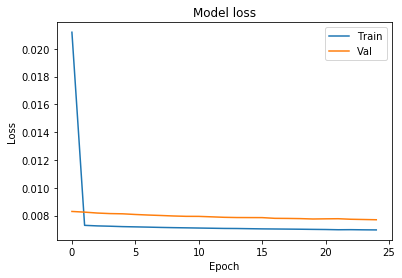

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

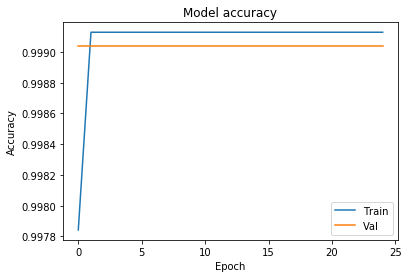

In [52]:
# Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# The model had no overfitting in this case.Different versions were stored as .h5 format